# Dataquest Guided Project:
## Finding the Best Markets to Advertise In

This project is based on a fictional e-learning company that offers courses on programming. Most courses are on web and mobile development, but the curriculum also includes data science, game dev, and other fields. We want to determine the two best markets for advertising our product.

We will use the [New Coder Survey](https://medium.freecodecamp.org/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969) from [freeCodeCamp](https://www.freecodecamp.org/) to explore our research question. freeCodeCamp is a company similar to ours, and their survey attracted new coders who read their [popular Medium publication](https://medium.freecodecamp.org/), who have varying interests.

In [1]:
import pandas as pd
survey = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv')
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Columns: 136 entries, Age to YouTubeTheNewBoston
dtypes: float64(105), object(31)
memory usage: 18.9+ MB


/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (17,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
survey.shape

(18175, 136)

In [3]:
survey.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We will use this comprehensive dataset to explore:

* Where new coders live and work
* Which locations have the greatest number of new coders
* How much money new coders are willing to spend on learning

To make sure this sample is representative of our population of interest, we will look at the `JobRoleInterest` column in more detail.

In [4]:
survey['JobRoleInterest'].value_counts(normalize=True)*100

Full-Stack Web Developer                                                                                                                                                                                                                                                    11.770595
  Front-End Web Developer                                                                                                                                                                                                                                                    6.435927
  Data Scientist                                                                                                                                                                                                                                                             2.173913
Back-End Web Developer                                                                                                                                                

It appears from this table that most new coders are interested in web development. However, most respondents have multiple interests. This isn't a problem, since our platform offers a wide variety of content.

It would be good to get a better idea of how many respondents were interested in more than one topic. In order accomplish this, we need to split the `JobRoleInterest` responses by commas `,`. This will turn each entry in the `JobRoleInterest` column into a list of interests. Then, we can count how many respondents listed more than one interest.

First, we need to drop `NaN` values, because they will cause `str.split` to throw an error.

In [5]:
interests = survey['JobRoleInterest'].dropna() #drop NaN values
interests_split = interests.str.split(',') #turn responses into lists
interests_count = interests_split.apply(lambda x: len(x)) #count number of items in each list
interests_count.value_counts(normalize=True).sort_index() * 100

1     31.650458
2     10.883867
3     15.889588
4     15.217391
5     12.042334
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
11     0.185927
12     0.300343
13     0.028604
Name: JobRoleInterest, dtype: float64

Only 31.65% of respondents have only one interest. The rest have multiple interests.

Since our platform focuses on web and mobile development, let's count how many respondents indicated an interest in either topic. We will use `str.contains` on the `interests` series without `NaN` values we defined above.

In [6]:
web_mobile = interests.str.contains('Web Developer|Mobile Developer')
web_mobile_count = web_mobile.value_counts(normalize=True)*100
web_mobile_count

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64

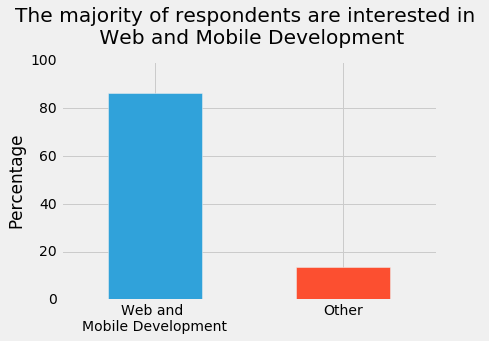

In [7]:
#graph the value counts
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

web_mobile_count.plot.bar()
plt.title('The majority of respondents are interested in \n Web and Mobile Development', y=1.05)
plt.ylabel('Percentage')
plt.ylim(0,100)
plt.xticks([0,1], ['Web and \nMobile Development', 'Other'], rotation=0)
plt.show()


These results indicate that new coders are a good market to advertise our platform in. Now, we need to figure out where these new coders are located, and how many new coders are in each location.

The survey provides two location variables: `CountryCitizen` and `CountryLive`. Since we are interested in where to advertise, we will use the `CountryLive` column. Since we only have country level data, we will reframe our question as "What are the two best countries to advertise in?", or more specifically "Which two countries have the most number of potential customers?"

To make sure our sample is representative, we will drop all rows where the participants didn't answer what role they were interested in.

In [8]:
survey_nona = survey.dropna(subset=['JobRoleInterest']).copy() #drop NaN values
absolute_freq = survey_nona['CountryLive'].value_counts()
relative_freq = survey_nona['CountryLive'].value_counts(normalize=True)*100

pd.DataFrame(data = {'Absolute Frequency': absolute_freq,
                    'Percentage': relative_freq}
            )


,Absolute Frequency,Percentage
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
Brazil,129,1.886517
Germany,125,1.828020
Australia,112,1.637906
Russia,102,1.491664
Ukraine,89,1.301550


The majority of new coders live in the US and India. However, before deciding on where to advertise, we need to also look into how much money respondents in each market are willing to spend on learning. Advertising within markets where most new coders are only willing to use free platforms for learning is unlikely to be profitable. We will use the `MoneyForLearning` column to answer this question.

We sell subscriptions for $59 US dollars per month, so we are interested in how much money each student spends _per month_. `MoneyForLearning` records how much money participants had spent on learning _total_ at the time they completed the survey.

Based on the frequency table generated above, we will narrow our analysis down to four countries: the US, India, the UK, and Canada. These are the four countries with the highest absolute frequencies, and they all have English as an official language. Our courses are written in English.

In [9]:
#money spent per month
#First replace 0 months with 1 month to avoid dividing by 0
survey_nona['MonthsProgramming'].replace(0,1, inplace=True) 
survey_nona['MoneyPerMonth'] = survey_nona['MoneyForLearning']/survey_nona['MonthsProgramming']
#number of null values in MoneyPerMonth:
survey_nona['MoneyPerMonth'].isnull().sum()

675

In [10]:
#Keep only rows that are not null in MoneyPerMonth and CountryLive
survey_nona = survey_nona.dropna(subset=['MoneyPerMonth','CountryLive']).copy()
country_money = survey_nona.loc[:,['CountryLive','MoneyPerMonth']]

#Only look at the 4 countries of interest
top4 = ['United States of America','India','United Kingdom','Canada']
country_money = country_money.loc[country_money['CountryLive'].isin(top4)]

#calculate mean MoneyPerMonth for each country
average_country_money = country_money.groupby(['CountryLive']).mean().sort_values(by=['MoneyPerMonth'],ascending=False)
average_country_money

,MoneyPerMonth
CountryLive,
United States of America,227.997996
India,135.100982
Canada,113.510961
United Kingdom,45.534443


These results are surprising, as we would expect India to spend less on learning than Canada or the UK. Let's look at the data more closely to figure out what's going on. First, we will use boxplots to check for outliers.

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


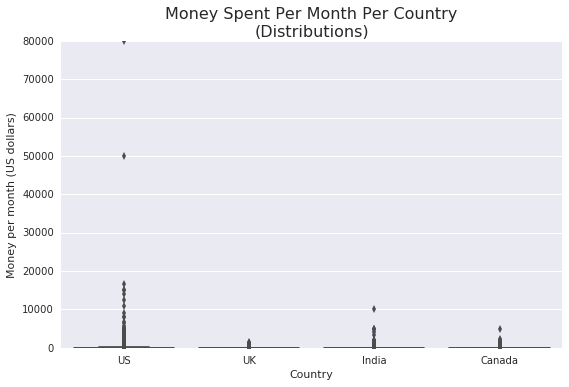

In [11]:
import seaborn as sns

sns.boxplot(y = 'MoneyPerMonth', 
            x = 'CountryLive', 
            data = country_money)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

While the data for India, the UK, and Canada look ok, there actually appears to be two extreme outliers in the US. Two participants reported spending over $50,000 per month on learning. We will remove these two outliers and repeat our analysis.

In [12]:
#Only include respondents who spend less than $40,000 a month
country_money = country_money[country_money['MoneyPerMonth'] < 40000]
#recalculate average money spent per month per country
average_country_money = country_money.groupby(['CountryLive']).mean().sort_values(by=['MoneyPerMonth'],ascending=False)
average_country_money

,MoneyPerMonth
CountryLive,
United States of America,183.800110
India,135.100982
Canada,113.510961
United Kingdom,45.534443


/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


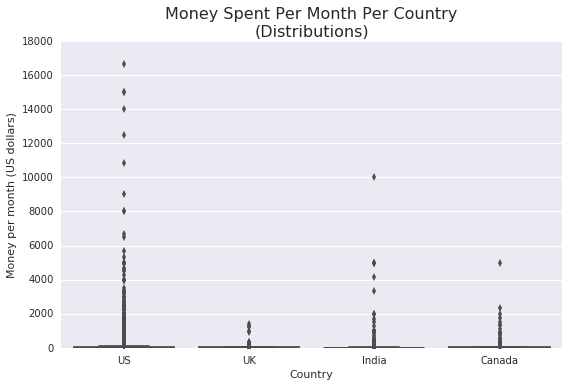

In [13]:
sns.boxplot(y = 'MoneyPerMonth', 
            x = 'CountryLive', 
            data = country_money)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

In general, money spent per month tends to be incredibly right skewed. Next steps could be to remove all participants more than 2 standard deviations outside the mean

In [24]:
mean = country_money['MoneyPerMonth'].mean()
st_dev = country_money['MoneyPerMonth'].std()
country_money_nooutliers = country_money[(country_money['MoneyPerMonth'] < (mean+2*st_dev)) & (country_money['MoneyPerMonth'] > (mean-2*st_dev))]

average_country_money = country_money_nooutliers.groupby(['CountryLive']).mean().sort_values(by=['MoneyPerMonth'],ascending=False)
average_country_money

,MoneyPerMonth
CountryLive,
United States of America,81.623608
Canada,75.550481
India,57.256604
United Kingdom,45.534443


/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


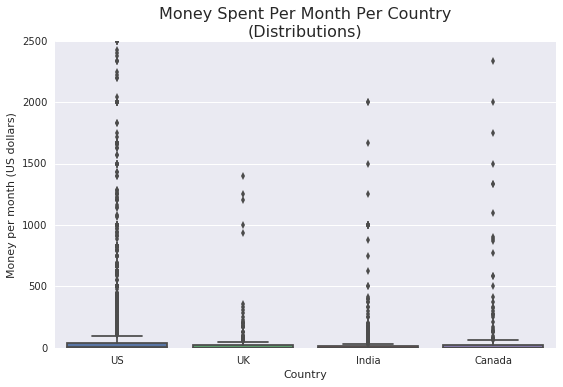

In [23]:
sns.boxplot(y = 'MoneyPerMonth', 
            x = 'CountryLive', 
            data = country_money_nooutliers)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

After removing outliers that are more than two standard deviations from the mean of the whole dataset, it is clear that Canadians are the most likely to spend more on learning on average. However, India is a large and diverse country, so the data may reflect inhomogeneity in the sample from India. For now, we will focus our marketing in Canada while the advertising team conducts research on the market in India.